<a href="https://colab.research.google.com/github/pushkarnarkhede/Mnist-Classification-using-ANN-MLP/blob/main/MNIST_Classification_using_ANN_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
#import keras inbuit dataset MNIST
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

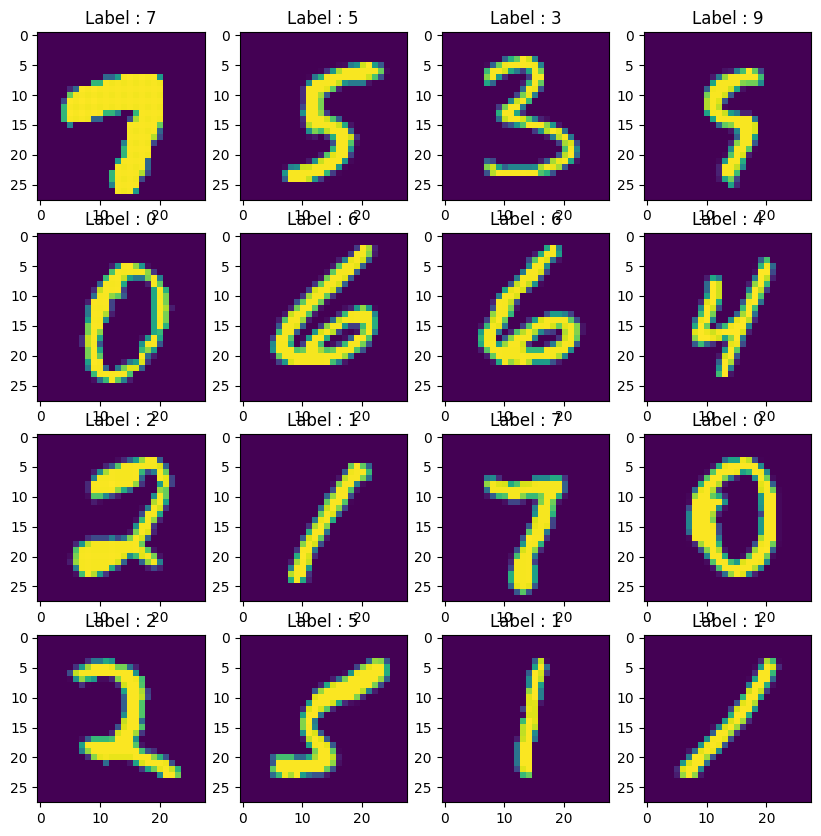

In [3]:
# plot some random images from the dataset
plt.figure(figsize=(10,10))
for i in range(1,17): # plotting random 16 images
  randomIndex = np.random.randint(0, X_train.shape[0])
  plt.subplot(4,4,i)
  plt.title("Label : " + str(y_train[randomIndex])) # showing label of the image belonging to particular class
  plt.imshow(X_train[randomIndex])

In [5]:
# Preapre the dataset for training and testing
# Normalize the dataset immage
# Convert the labels to categorical

def prepare_dataset(train_images,train_labels, test_images, test_labels):
  train_images = tf.keras.utils.normalize(train_images, axis=1)
  train_labels = tf.keras.utils.to_categorical(train_labels)

  test_images = tf.keras.utils.normalize(test_images, axis=1)
  test_labels = tf.keras.utils.to_categorical(test_labels)

  return train_images, train_labels, test_images, test_labels

In [6]:
print("X_train Before Normalization : ", np.max(X_train))
print("y_train Before conversion to categorical : ", y_train[0])
print("X_test Before Normalization : ", np.max(X_test))
print("y_test Before conversion to categorical : ", y_test[0])

X_train,y_train,X_test,y_test = prepare_dataset(X_train,y_train,X_test,y_test)
print("X_train After Normalization : ", np.max(X_train))
print("y_train After conversion to categorical : ", y_train[0])
print("X_test After Normalization : ", np.max(X_test))
print("y_test After conversion to categorical : ", y_test[0])

X_train Before Normalization :  255
y_train Before conversion to categorical :  5
X_test Before Normalization :  255
y_test Before conversion to categorical :  7
X_train After Normalization :  1.0
y_train After conversion to categorical :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
X_test After Normalization :  1.0
y_test After conversion to categorical :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [7]:
# Prepare the model using keras sequential model
def prepare_model(input_shape, output_shape):
  '''
  this function accept the input shape and return the model with 3 dense layers
  including the output layer.
  this function takes care of flattening the input 3d image array into 2d array by including Flatten layer
  at the top of the model.
  '''
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape = (input_shape)))

  model.add(tf.keras.layers.Dense(units = 32, activation = tf.keras.activations.relu))
  model.add(tf.keras.layers.Dense(units = 16, activation = tf.keras.activations.relu))

  model.add(tf.keras.layers.Dense(units = output_shape, activation = tf.keras.activations.softmax))

  return model

In [9]:
from math import e
# set the configuration for the model such as input shape, batch size, epocs and output size.
INPUT_SHAPE = (X_train.shape[1],X_train.shape[2])
OUTPUT_SHAPE = y_train.shape[1]

EPOCS = 10
BATCH_SIZE = 16

OPTIMIZER = tf.keras.optimizers.Adam()
LOSS = tf.keras.losses.categorical_crossentropy

# Prepare the model using preapre_model function
model = prepare_model(INPUT_SHAPE, OUTPUT_SHAPE)

# Print the summary of model
model.summary()

# Compile the model
model.compile(optimizer = OPTIMIZER, loss = LOSS, metrics = ["accuracy"])

# Train the model with the dataset that we have prepared
model.fit(X_train,y_train,epochs = EPOCS, batch_size = BATCH_SIZE)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 25818 (100.85 KB)
Trainable params: 25818 (100.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.3740 - accuracy: 0.8949
Epoch 2/10
3750/3750 [========================

In [24]:
def plot_model_history():
  plt.plot(model.history.history['accuracy'], color = 'r', label = 'Accuracy')
  plt.plot(model.history.history['loss'], color = 'b', label = 'Loss')
  plt.legend(loc = 'center right')
  plt.title('Accuracy / Loss Plot')
  plt.xlabel('Epochs')

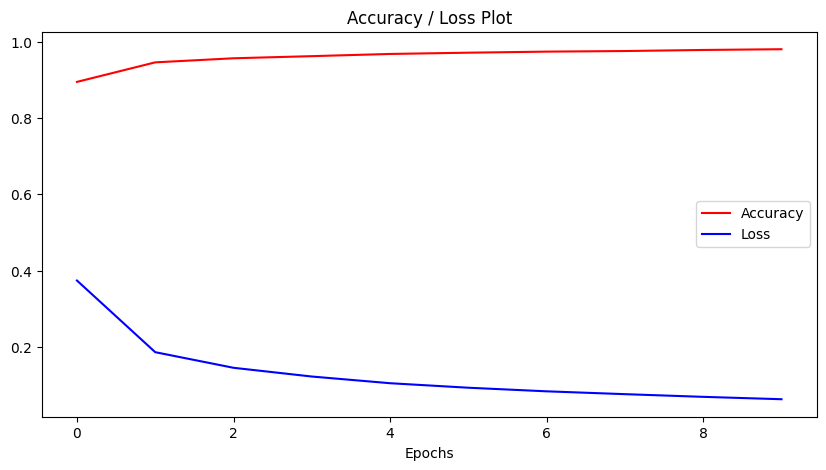

In [25]:
# Plot the accuray and loss plot to understand how model performed during training
plt.figure(figsize=(10,5))
plot_model_history()

In [33]:
# do some prediction using the model
def predict_single_image(model, image):
  image = image.reshape(1,28,28)
  image = tf.keras.utils.normalize(image, axis = 1)
  prediction = model.predict(image)
  return np.argmax(prediction)

In [39]:
for i in range(1,17):
  random_index = np.random.randint(0,X_test.shape[0])
  print("Original Lable : ", np.argmax(y_test[random_index]))
  print("Predicted Label : ", predict_single_image(model, X_test[random_index]))


Original Lable :  5
1/1 [==============================] - 0s 33ms/step
Predicted Label :  5
Original Lable :  9
1/1 [==============================] - 0s 22ms/step
Predicted Label :  9
Original Lable :  1
1/1 [==============================] - 0s 20ms/step
Predicted Label :  1
Original Lable :  3
1/1 [==============================] - 0s 22ms/step
Predicted Label :  3
Original Lable :  6
1/1 [==============================] - 0s 32ms/step
Predicted Label :  6
Original Lable :  5
1/1 [==============================] - 0s 19ms/step
Predicted Label :  5
Original Lable :  3
1/1 [==============================] - 0s 19ms/step
Predicted Label :  3
Original Lable :  5
1/1 [==============================] - 0s 20ms/step
Predicted Label :  5
Original Lable :  8
1/1 [==============================] - 0s 21ms/step
Predicted Label :  8
Original Lable :  5
1/1 [==============================] - 0s 20ms/step
Predicted Label :  5
Original Lable :  4
1/1 [==============================] - 0s 20ms/ste